LOF结合普通的BN：直接使用LofWithBN中生成的数据作为输入
===

In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
from theano import shared
import pandas as pd
from matplotlib import gridspec
from sklearn.decomposition import PCA, KernelPCA
from mpl_toolkits.mplot3d import Axes3D
# from Plot_XZ import *
# from PCA import *

D:\Softwares\Python\Python_Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
plt.style.use('default')

font1 ={'family': 'times new roman', 'weight':'light', 'size': 12}  
# font2 ={'family': 'Arial', 'weight':'normal', 'size': 12}  
def Plot_XZ(elec_year, elec_faults, Savefig):
# 画出原始图
    Company_names = ['Xizang', 'Xinjiang', 'Heilongjiang']
    k = np.array([0, 41, 83])
    j= 0
    # j, k1 = 0, 6
    plt.figure(figsize=(4, 3), facecolor='w')
    A = []
    xp = np.linspace(1, 12, 12)
    ax = plt.subplot(1, 1, 1)
#     ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
    for jx in range(7):
        ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=4, linewidth=1)
#     ax.scatter(elec_year[0:7], elec_faults[0:7], elec_year[0:7], cmap=plt.cm.winter)
        # j = j+k1
#     ax.set_xticklabels(['2016', '2010', '2011', '2012', '2013', '2014', '2015'], fontsize='small')
    ax.set_xlabel("time(year)", fontdict=font1)
    plt.ylabel("Failure rate(%)", fontdict=font1)
    plt.legend([Company_names[0]], loc='upper left', frameon=False, fontsize='small')
#     plt.grid()
    if Savefig == 1:
        plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\LOFG_BN\\Picture\\1.svg', format='svg')
    plt.show()
    plt.figure(figsize=(4, 3), facecolor='w')

    ax = plt.subplot(1, 1, 1)
    for jx in range(7, 18, 1):
        ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=4, linewidth=1)
        # j = j+k1
    ax.set_xticklabels(['2016','2010', '2011', '2012', '2013', '2014', '2015'], fontsize='small')
    ax.set_xlabel("time(year)", fontdict=font1)
    plt.ylabel("Failure rate(%)", fontdict=font1)
    plt.legend([Company_names[1]], loc='upper left', frameon=False, fontsize='small')
#     plt.grid()
    if Savefig == 1:
        plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\LOFG_BN\\Picture\\2.svg', format='svg')
    plt.show()
    
    plt.figure(figsize=(4, 3), facecolor='w')
    ax = plt.subplot(1, 1, 1)
    for jx in range(18, 25, 1):
        ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=4, linewidth=1)
        # j = j+k1
    ax.set_xticklabels(['2016','2010', '2011', '2012', '2013', '2014', '2015'], fontsize='small')
    ax.set_xlabel("time(year)", fontdict=font1)
    plt.ylabel("Failure rate(%)", fontdict=font1)
    plt.legend([Company_names[2]], loc='upper left', frameon=False, fontsize='small')
#     leg = plt.legend()
#     leg.get_frame().set_linewidth(0.0)
    
#     plt.grid()
    if Savefig == 1:
        plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\LOFG_BN\\Picture\\3.svg', format='svg')
    plt.show()
    return 0

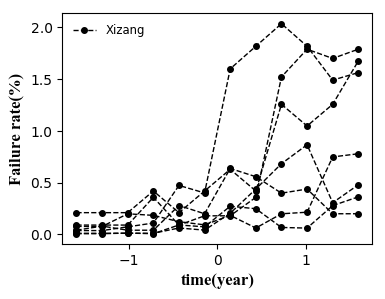

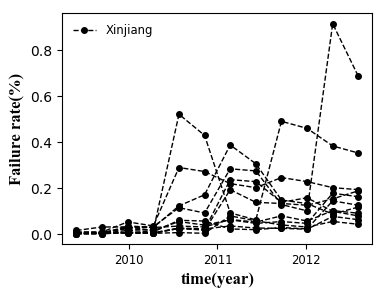

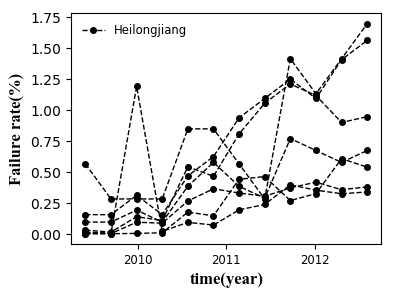

In [3]:
np.set_printoptions(precision=0, suppress=True)
Savefig = 0 # 控制图形显示存储

elec_data = pd.read_csv('XZnozero_12.csv')

# 计算同一公司产品测试地点数目：
companies_num = elec_data.counts.unique()
companies = len(companies_num)  # companies=7， 共7个测试地点
company_lookup = dict(zip(companies_num, range(len(companies_num))))
company = elec_data['company_code'] = elec_data.counts.replace(company_lookup).values  # 加一行数据在XZsingal文件中
# companys = elec_data.counts.values - 1 # 这一句以上面两行功能相同

# 计算不同公司数目
company_ABC = elec_data.company.unique()
companiesABC = len(company_ABC)  # companies=7， 共7个测试地点
company_lookup_ABC = dict(zip(company_ABC, range(len(company_ABC))))
companyABC = elec_data['company_ABC'] = elec_data.company.replace(company_lookup_ABC).values  # 加一行数据在XZsingal文件中
# companys = elec_data.counts.values - 1 # 这一句以上面两行功能相同
# elec_count = elec_data.counts.values

# 给所有特征因素加上高斯噪声
SNR = np.random.normal(0, 1, size=[len(elec_data.Year.values), 4])
SNR_Tem = np.random.normal(0, 0.5, size=[len(elec_data.Year.values), 1])
# #特征因素分析

elec_tem = elec_data.Tem.values + SNR_Tem[:, 0] # 观测温度值x2
elec_tem1 = (elec_tem - np.mean(elec_tem)) / np.std(elec_tem)
elec_hPa = elec_data.hPa.values + SNR[:, 1]  # 观测压强x3
elec_hPa1 = (elec_hPa - np.mean(elec_hPa)) / np.std(elec_hPa)
elec_RH = elec_data.RH.values + SNR[:, 2] # 观测压强x3
elec_RH1 = (elec_RH - np.mean(elec_RH)) / np.std(elec_RH)
elec_Lux = elec_data.Lux.values + SNR[:, 3] # 观测压强x3
elec_Lux1 = (elec_Lux - np.mean(elec_Lux)) / np.std(elec_Lux)


# 计算观测时间，温度，光照等环境条件
elec_year = elec_data.Year.values  # 观测时间值x1
Norm_year_Mean = np.mean(elec_year)
Norm_year_std = np.std(elec_year)
elec_year1 = (elec_year - np.mean(elec_year)) / np.std(elec_year)
data_cs_year = elec_year
# data_cs_year[42:45] = 12
# print(elec_year1)

elec_data.Fault.values[202] =200
elec_data.Fault.values[203] =150
elec_data.Fault.values[218] =165
# 计算故障率大小：故障数目/总测量数，作为模型Y值，放大100倍以增加实际效果，结果中要缩小100倍
elec_faults = 100 * (elec_data.Fault.values / elec_data.Nums.values)  # 数组形式,计算故障率大小
elec_faults1 = (elec_faults - np.mean(elec_faults)) / np.std(elec_faults)

# print(elec_faults)
# 将故障率以6组一行形式组成数组,变成：21*6
elec_faults2 = np.array([elec_faults[i*12:(i+1)*12] for i in np.arange(25)])
elec_year2 = np.array([elec_year1[i*12:(i+1)*12] for i in np.arange(25)])
elec_char1 = np.array([elec_tem1[i*12:(i+1)*12] for i in np.arange(25)])
elec_char2 = np.array([elec_hPa1[i*12:(i+1)*12] for i in np.arange(25)])
companyABC2 = np.array([companyABC[i*12:(i+1)*12] for i in np.arange(25)])

# 共享变量设置
xs_char1 = shared(np.asarray(elec_tem1))
xs_char2 = shared(np.asarray(elec_hPa1))
xs_char3 = shared(np.asarray(elec_RH1))

ys_faults = shared(np.asarray(elec_faults))
xs_year = shared(np.asarray(elec_year1))
Num_shared = shared(np.asarray(companyABC))
# print(companyABC)
# print(companiesABC)
# print(len(data_cs_year))
# print(len(elec_faults))
# 画图
Plot_XZ(elec_year2, elec_faults2, Savefig)


def logit(x):
    return 1/(1+np.exp(-x))
def tlogit(x):
    return 1/(1+tt.exp(-x))
def Phi(x):
    # probit transform
    return 0.5 + 0.5 * pm.math.erf(x/pm.math.sqrt(2))

In [4]:
# 相关系数计算,应用公式0.5*value+0.5可以将相关系数矩阵的值域由[-1,1]映射为[0,1]
All_data = np.vstack((elec_faults1,elec_year1, elec_tem1, elec_hPa1, elec_RH1)).T
# print(All_data)
Cor_all = np.corrcoef(All_data, rowvar=0)
Cor_all = 0.5*Cor_all+0.5
# print(Cor_all)
# for i in np.arange(len(Cor_all)):
#     print(Cor_all[0][i])
#     print(Cor_all[1][i])
#     print(Cor_all[2][i])
#     print(Cor_all[3][i])
#     print(Cor_al l[4][i])
Weight = np.array([1.0, 0.7311650684715499, 0.4273930180878881 ,0.35659903015510097 ,0.6406373000946504])
Weight_sqrt = np.sqrt(Weight) #取平方根作为LOF权重
for i in range(5):
    print(Weight_sqrt[i])

1.0
0.8550819074635774
0.6537530252992242
0.5971591330249425
0.8003982134504364


In [5]:
# 建模，模型
with pm.Model() as model_1:
    # define priors
    alpha = pm.HalfCauchy('alpha', 10, testval=.6)
    
#     a0 = pm.Normal('a0', 0., 1.)
#     σ_a = pm.HalfCauchy('σ_a', 2.)
#     Δ_a = pm.Normal('Δ_a', 0., 20., shape=companiesABC)


    theta5 = pm.Normal('theta5', 0, 10)  
    mu_5 = pm.Normal('mu_5', mu=theta5, tau=0.001)
    sd_5 = pm.HalfCauchy('sd_5', 10)

    theta4 = pm.Normal('theta4', 0, 10)  
    mu_4 = pm.Normal('mu_4', mu=theta4, tau=0.001)
    sd_4 = pm.HalfCauchy('sd_4', 10)
    
    theta3 = pm.Normal('theta3', 0, 10)
    mu_3 = pm.Normal('mu_3', mu=theta3, tau=0.001)
    sd_3 = pm.HalfCauchy('sd_3', 10)
    
    theta2 = pm.Normal('theta2', 0, 10)
    mu_2 = pm.Normal('mu_2', mu=theta2, tau=0.001)
    sd_2 = pm.HalfCauchy('sd_2', 10)
    
#     mu1_sd = pm.Uniform('mu1_sd', lower=0.001, upper=10)
#     theta1 = pm.Deterministic('theta1', a0 + (σ_a*Δ_a).cumsum())
#     mu_1 = pm.Normal('mu_1', mu=theta1, tau=mu1_sd, shape=companiesABC)
    mu_1 = pm.Normal('mu_1', mu=0, tau=0.001)
    sd_1 = pm.HalfCauchy('sd_1', 10)

    beta5 = pm.Normal('beta5', mu_5, sd_5, shape=companiesABC)  
    beta4 = pm.Normal('beta4', mu_4, sd_4, shape=companiesABC) 
    beta3 = pm.Normal('beta3', mu_3, sd_3, shape=companiesABC)
    beta2 = pm.Normal('beta2', mu_2, sd_2, shape=companiesABC)
    theta1 = pm.Normal('theta1', mu_1, sd_1, shape=companiesABC)
    beta_sd = pm.HalfCauchy('beta_sd', 20)
    beta = pm.Normal('beta', 0, beta_sd)
    
#     up_u = pm.HalfCauchy('up_u', 10)
#     u = pm.Uniform('u',lower=0.001, upper=5) 
#                             u*( tt.sqrt(theta1[Num_shared]**2) + tt.sqrt(beta2[Num_shared]**2)+ tt.sqrt(beta5[Num_shared]**2))
    beta_mu = pm.Deterministic('beta_mu', 
                               tt.exp(beta +  \
                                            (theta1[Num_shared] * xs_year + beta2[Num_shared] * xs_char1 +\
                                             beta3[Num_shared] * xs_char2 + beta4[Num_shared] * xs_char3 + beta5[Num_shared] * xs_year**2)) )

    Observed = pm.Weibull("Observed", alpha=alpha, beta=beta_mu, observed=ys_faults)  # 观测值
    trace_1 = pm.sample(2000,  init='advi+adapt_diag' )

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = -167.87:  17%|████████▌                                         | 34342/200000 [00:46<03:42, 744.03it/s]
Convergence archived at 34400
Interrupted at 34,399 [17%]: Average Loss = 1.0661e+06
D:\Softwares\Python\Python_Anaconda\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|█████████████████████████████████████████████████████████████████████████████▉| 2498/2500 [01:48<00:00, 23.04it/s]D:\Softwares\Python\Python_Anaconda\lib\site-packages\pymc3\step_methods\hmc\nuts.py:467: UserWarning: Chain 0 contains 177 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|████████████████████████████████████████████

             mean         sd  mc_error    hpd_2.5   hpd_97.5
sd_2     1.126071   1.731295  0.087541   0.055577   4.104840
mu_2     0.016849   1.072324  0.034400  -2.040790   1.850059
theta2   0.033598   8.973543  0.243761 -17.166680  17.268138
sd_3     3.911647   4.896073  0.223705   0.090615  12.704389
mu_3    -0.957925   3.370832  0.154583  -8.179737   6.706426
theta3  -0.417482   9.904322  0.285321 -19.983084  18.200297
sd_4     0.712594   1.146196  0.050095   0.036010   2.632904
mu_4     0.301937   0.637959  0.022663  -0.684258   1.715261
theta4   0.748742   9.523859  0.282027 -17.517257  20.057938
beta_sd  8.954517  16.955926  0.465043   0.029241  31.738323
               mean        sd  mc_error   hpd_2.5  hpd_97.5
beta2__0   0.072823  0.587262  0.022455 -1.088086  1.367244
beta2__1  -0.100880  0.184768  0.007472 -0.468218  0.237650
beta2__2   0.077676  0.321335  0.012586 -0.542820  0.727736
beta3__0   0.150788  0.968582  0.048749 -1.560725  2.170240
beta3__1  -1.699186  1.641111

D:\Softwares\Python\Python_Anaconda\lib\site-packages\pymc3\stats.py:220: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=-464.75934771002665, WAIC_se=60.72821226422374, p_WAIC=16.6450617511677)


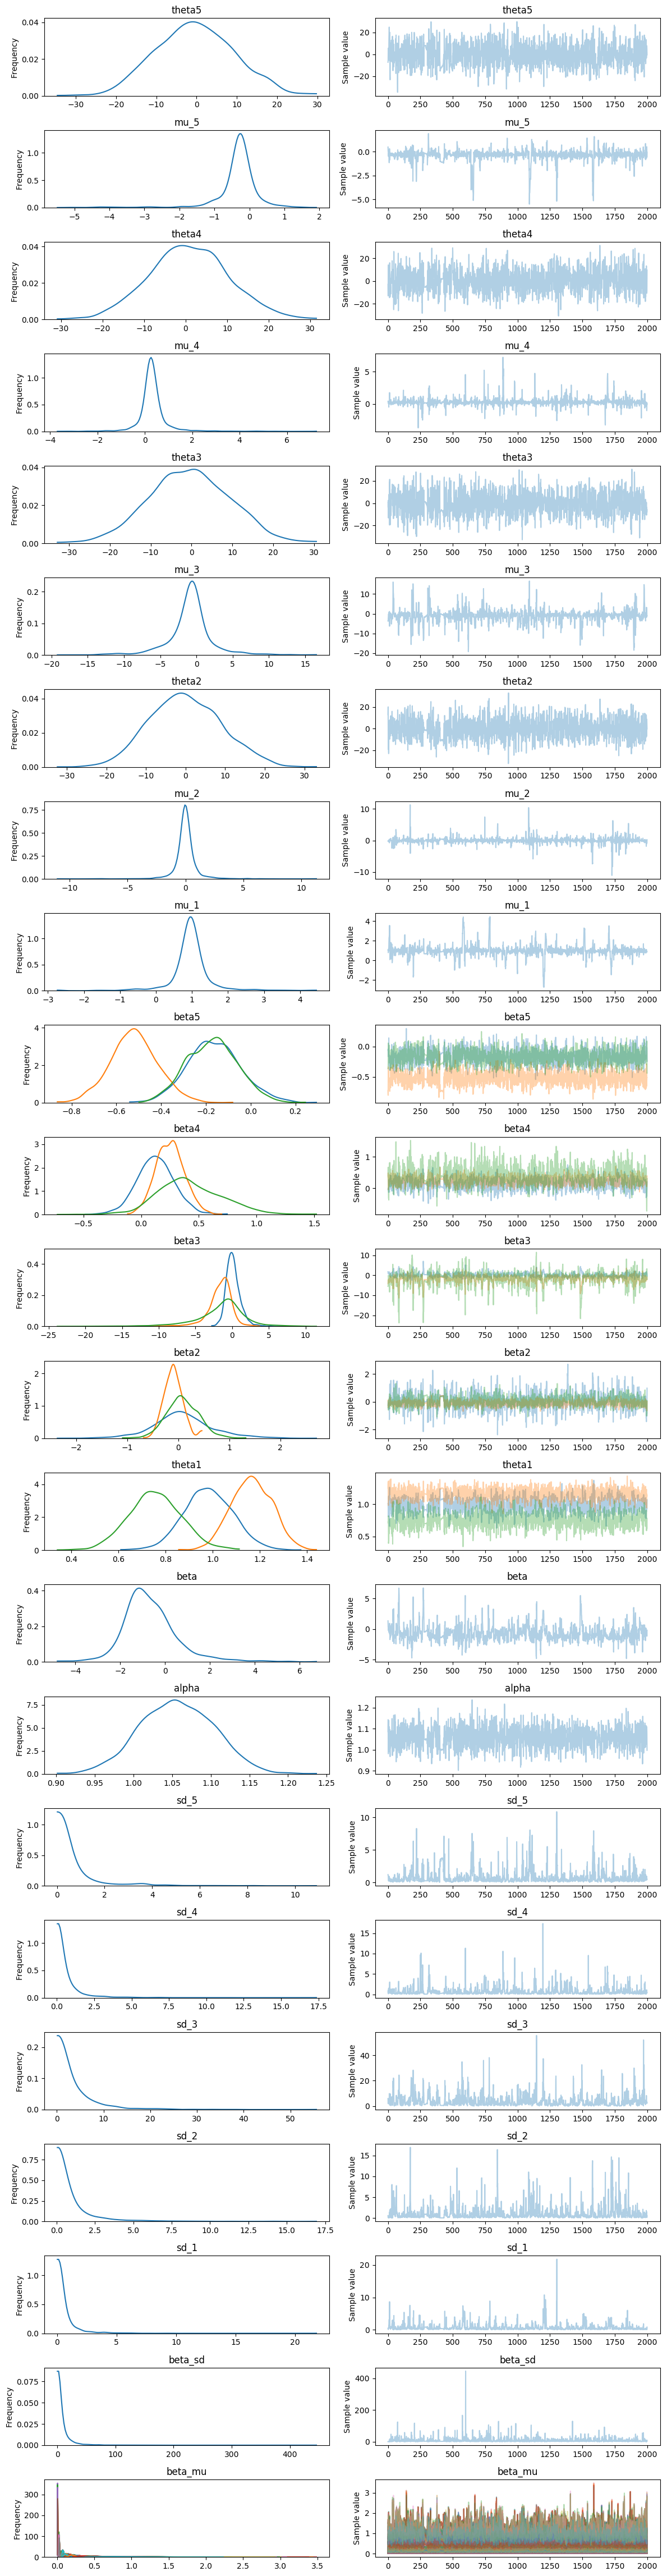

In [6]:
varnames1 = ['sd_2', 'mu_2', 'theta2', 'sd_3', 'mu_3', 'theta3', 'sd_4', 'mu_4', 'theta4', 'beta_sd']
tmp_mu1 = pm.df_summary(trace_1, varnames1)
print(tmp_mu1)
varnames1 = ['beta2', 'beta3', 'beta4', 'beta5', 'theta1']
tmp_mu1 = pm.df_summary(trace_1, varnames1)
print(tmp_mu1)


WAIC_1 = pm.waic(trace_1, model_1)
print(WAIC_1)
chain_1 = trace_1[1000:]
pm.traceplot(trace_1)
plt.show()

D:\Softwares\Python\Python_Anaconda\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


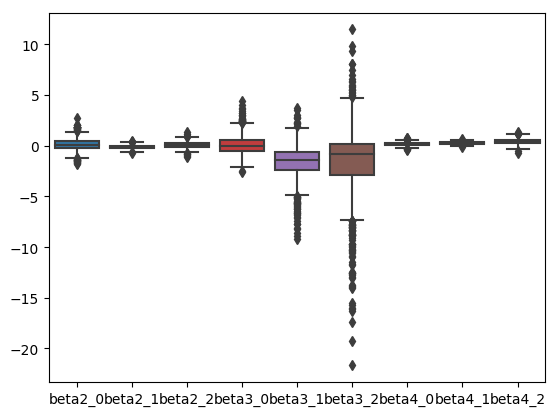

In [7]:
beta2 = chain_1['beta2']
beta3 = chain_1['beta3']
beta4 = chain_1['beta4']
# print(beta2)
beta2_0 = beta2[:,0]
beta2_1 = beta2[:,1]
beta2_2 = beta2[:,2]



#新建一个空的DataFrame
df=pd.DataFrame()

df["beta2_0"] = beta2_0
df["beta2_1"] = beta2_1
df["beta2_2"] = beta2_2
df["beta3_0"] = beta3[:,0]
df["beta3_1"] = beta3[:,1]
df["beta3_2"] = beta3[:,2]
df["beta4_0"] = beta4[:,0]
df["beta4_1"] = beta4[:,1]
df["beta4_2"] = beta4[:,2]
# print(df)
 #用matplotlib来画出箱型图
# plt.boxplot(x=df.values,labels=df.columns,whis=1)
sns.boxplot(data=df)
plt.show()


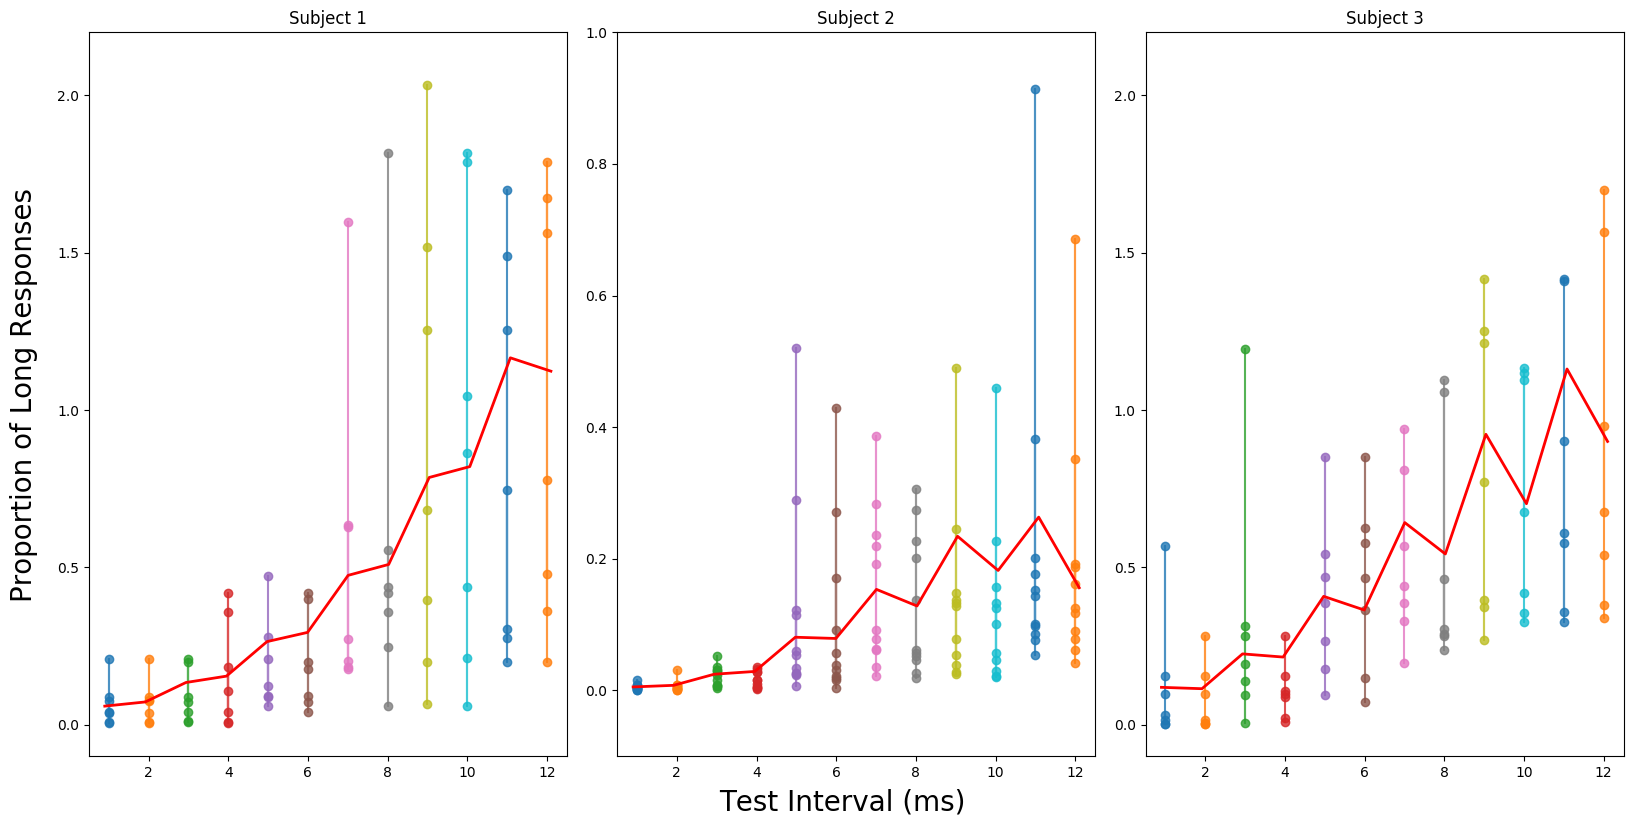

In [8]:
varnames1 = ['beta_mu']
tmp_mu1 = pm.df_summary(chain_1, varnames1)
Beta_Mu1 = tmp_mu1['mean']

Beta_Mu_1 = np.array([Beta_Mu1[i*12:(i+1)*12] for i in np.arange(25)])


fig = plt.figure(figsize=(16, 8))
fig.text(0.5, -0.02, 'Test Interval (ms)', ha='center', fontsize=20)
fig.text(-0.02, 0.5, 'Proportion of Long Responses', va='center', rotation='vertical', fontsize=20)
gs = gridspec.GridSpec(1, 3)
ppcsamples = 100


for ip in np.arange(companiesABC):
    ax = plt.subplot(gs[ip])
    xp = elec_year2[ip*7:(ip+1)*7, :]*Norm_year_std + Norm_year_Mean
    yp = elec_faults2[ip*7:(ip+1)*7, :]
    
    y2 = Beta_Mu_1[ip*7:(ip+1)*7, :]
    if ip==1:
        xp = elec_year2[ip*7:((ip+1)*7+4), :]*Norm_year_std + Norm_year_Mean
        yp = elec_faults2[ip*7:((ip+1)*7+4), :]
        y2 = Beta_Mu_1[ip*7:((ip+1)*7+4), :]
    if ip==2:
        xp = elec_year2[18:25, :]*Norm_year_std + Norm_year_Mean
        yp = elec_faults2[18:25, :]
        y2 = Beta_Mu_1[18:25, :]
    xl = np.linspace(0.9, 12.1, 12)

    
    y2 = y2.mean(axis=0)
#     print(y2)
    ax.plot(xp, yp, marker='o', alpha=.8)
    plt.plot(xl, y2,  'r', linewidth=2)
    plt.axis([0.5, 12.5, -.1, 2.2])
    if ip==1:
        plt.axis([0.5, 12.5, -.1, 1.0])
    plt.title('Subject %s' % (ip + 1))

plt.tight_layout()
plt.show()

In [9]:
# 读取LOF权重处理之后的数据
Weight_Fault_ABC_All = np.loadtxt('Weight_Fault_ABC_All.csv',delimiter = ',')
Weight_Fault_ABC_All2 = np.array([Weight_Fault_ABC_All[i*12:(i+1)*12] for i in np.arange(25)])
ys_faults_Model2 = shared(np.asarray(Weight_Fault_ABC_All))

In [10]:
# 建模，模型
with pm.Model() as model_2:
    # define priors
    alpha = pm.HalfCauchy('alpha', 10, testval=.6)
    
    a0 = pm.Normal('a0', 0., 1.)
    σ_a = pm.HalfCauchy('σ_a', 2.)
    Δ_a = pm.Normal('Δ_a', 0., 20., shape=companiesABC)


    theta5 = pm.Normal('theta5', 0, 10)  
    mu_5 = pm.Normal('mu_5', mu=theta5, tau=0.001)
    sd_5 = pm.HalfCauchy('sd_5', 10)

    
    
    wsd_4 = pm.Uniform('wsd_4',lower=-3, upper=3) 
    wsd_3 = pm.Uniform('wsd_3',lower=-3, upper=3) 
    wsd_2 = pm.Uniform('wsd_2',lower=-3, upper=3) 
    
    wmu_4 = pm.Uniform('wmu_4',lower=-3, upper=3) 
    wmu_3 = pm.Uniform('wmu_3',lower=-3, upper=3) 
    wmu_2 = pm.Uniform('wmu_2',lower=-3, upper=3) 
    
    wMusd_4 = pm.Uniform('wMusd_4',lower=-3, upper=3)
    wMusd_3 = pm.Uniform('wMusd_3',lower=-3, upper=3)
    wMusd_2 = pm.Uniform('wMusd_2',lower=-3, upper=3)
    
    theta4 = pm.Normal('theta4', 0.3+wmu_4, 10)  
    mu_4 = pm.Normal('mu_4', mu=theta4, sd=0.5+wMusd_4)
    sd_4 = pm.HalfCauchy('sd_4', 3+wsd_4)
    
    theta3 = pm.Normal('theta3', -1.9+wmu_3, 10)
    mu_3 = pm.Normal('mu_3', mu=theta3, sd=0.5+wMusd_3)
    sd_3 = pm.HalfCauchy('sd_3', 5+wsd_3)
    
    theta2 = pm.Normal('theta2', -0.1+wmu_2, 10)
    mu_2 = pm.Normal('mu_2', mu=theta2, sd=0.3+wMusd_2)
    sd_2 = pm.HalfCauchy('sd_2', 5+wsd_2)

#     theta4 = pm.Normal('theta4', 0, 10)  
#     mu_4 = pm.Normal('mu_4', mu=theta4, tau=0.001)
#     sd_4 = pm.HalfCauchy('sd_4', 10)
    
#     theta3 = pm.Normal('theta3', 0, 10)
#     mu_3 = pm.Normal('mu_3', mu=theta3, tau=0.001)
#     sd_3 = pm.HalfCauchy('sd_3', 10)
    
#     theta2 = pm.Normal('theta2', 0, 10)
#     mu_2 = pm.Normal('mu_2', mu=theta2, tau=0.001)
#     sd_2 = pm.HalfCauchy('sd_2', 10)
    
#     mu1_sd = pm.Uniform('mu1_sd', lower=0.001, upper=10)
    theta1 = pm.Deterministic('theta1', a0 + (σ_a*Δ_a).cumsum())
#     mu_1 = pm.Normal('mu_1', mu=theta1, tau=mu1_sd, shape=companiesABC)
#     mu_1 = pm.Normal('mu_1', mu=0, tau=0.001, shape=companiesABC)
#     sd_1 = pm.HalfCauchy('sd_1', 10)

    beta5 = pm.Normal('beta5', mu_5, sd_5, shape=companiesABC)  
    beta4 = pm.Normal('beta4', mu_4, sd_4, shape=companiesABC) 
    beta3 = pm.Normal('beta3', mu_3, sd_3, shape=companiesABC)
    beta2 = pm.Normal('beta2', mu_2, sd_2, shape=companiesABC)
#     beta1 = pm.Normal('beta1', mu_1, sd_1, shape=companiesABC)
    beta_sd = pm.HalfCauchy('beta_sd', 10)
    beta = pm.Normal('beta', 0, beta_sd)
    
#     up_u = pm.HalfCauchy('up_u', 10)
    u = pm.Uniform('u',lower=0.001, upper=3) 
# tt.sqrt(beta3[Num_shared]**2)+ tt.sqrt(beta4[Num_shared]**2)) + \
    beta_mu2 = pm.Deterministic('beta_mu2', 
                               tt.exp(beta + \
                            u*( tt.sqrt(theta1[Num_shared]**2) + tt.sqrt(beta2[Num_shared]**2)+ tt.sqrt(beta5[Num_shared]**2))  + \
                                            (theta1[Num_shared] * xs_year + beta2[Num_shared] * xs_char1 +\
                                             beta3[Num_shared] * xs_char2 + beta4[Num_shared] * xs_char3 + beta5[Num_shared] * xs_year**2)) )

    Observed2 = pm.Weibull("Observed2", alpha=alpha, beta=beta_mu2, observed=ys_faults_Model2)  # 观测值
    trace_2 = pm.sample(2000,  init='advi+adapt_diag' )

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = inf:  14%|███████▌                                              | 27871/200000 [00:46<04:46, 600.21it/s]
Convergence archived at 27900
Interrupted at 27,899 [13%]: Average Loss = 14,820
D:\Softwares\Python\Python_Anaconda\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|█████████████████████████████████████████████████████████████████████████████▉| 2499/2500 [07:03<00:00,  5.90it/s]D:\Softwares\Python\Python_Anaconda\lib\site-packages\pymc3\step_methods\hmc\nuts.py:467: UserWarning: Chain 0 contains 657 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|████████████████████████████████████████████████

             mean         sd  mc_error   hpd_2.5   hpd_97.5
sd_2     0.780607   1.023990  0.062950  0.007549   2.973361
mu_2    -0.008535   0.791158  0.047612 -1.037379   1.696201
theta2  -0.048278   2.201380  0.093650 -4.782573   4.580961
sd_3     4.219934   3.723150  0.213497  0.033437  11.142587
mu_3    -1.991801   3.150822  0.203062 -9.200883   4.229292
theta3  -1.991704   3.630544  0.214683 -9.765281   5.058681
sd_4     0.272747   0.339399  0.018834  0.003575   0.945025
mu_4     0.223532   0.236604  0.010170 -0.174314   0.846397
theta4   0.114239   1.909967  0.097571 -3.981240   4.058817
beta_sd  6.609684  11.664354  0.446694  0.031457  20.585629
               mean        sd  mc_error    hpd_2.5  hpd_97.5
beta2__0   0.100680  0.506972  0.025580  -0.862839  1.209984
beta2__1  -0.157294  0.159868  0.007053  -0.487780  0.128813
beta2__2   0.040085  0.296483  0.015921  -0.501211  0.638667
beta3__0   0.733609  1.234091  0.086715  -1.388291  3.154146
beta3__1  -3.356859  2.342451  0.16

D:\Softwares\Python\Python_Anaconda\lib\site-packages\pymc3\stats.py:220: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=-506.5680805329546, WAIC_se=57.245295784523286, p_WAIC=14.713485132251966)


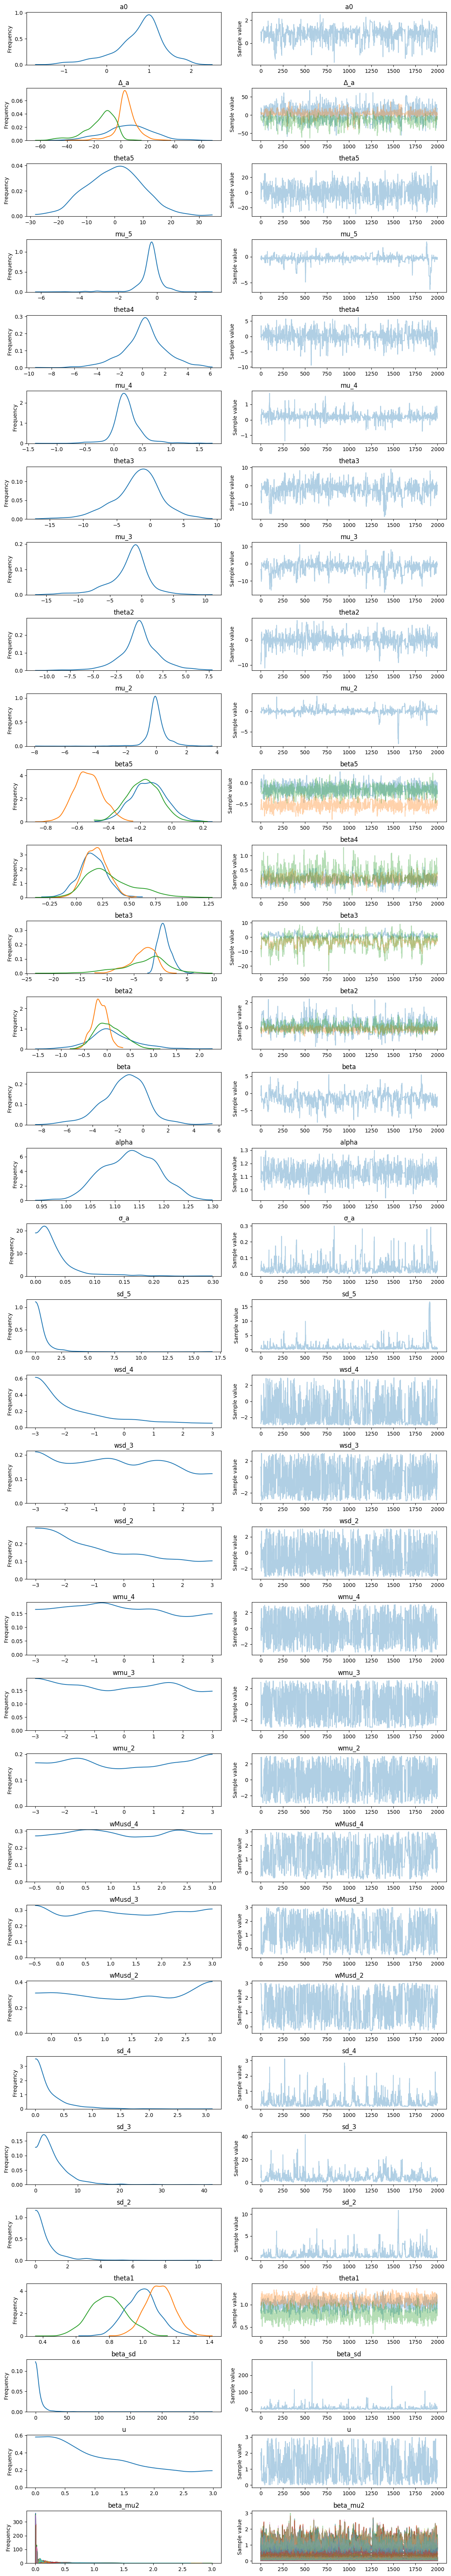

In [11]:
varnames2 = ['sd_2', 'mu_2', 'theta2', 'sd_3', 'mu_3', 'theta3', 'sd_4', 'mu_4', 'theta4', 'beta_sd']
tmp_mu2 = pm.df_summary(trace_2, varnames2)
print(tmp_mu2)

varnames2 = ['beta2', 'beta3', 'beta4', 'beta5', 'theta1']
tmp_mu2 = pm.df_summary(trace_2, varnames2)
print(tmp_mu2)

WAIC_2 = pm.waic(trace_2, model_2)
print(WAIC_2)
chain_2 = trace_2[1000:]
pm.traceplot(trace_2)
plt.show()

D:\Softwares\Python\Python_Anaconda\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


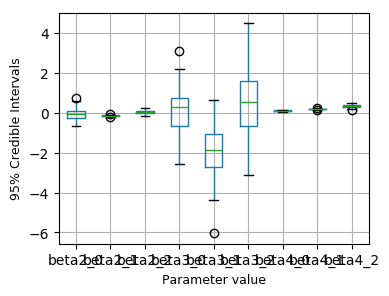

In [12]:
import pandas as pd  
font2 ={'family': 'times', 'weight':'light', 'size': 9}  
def list_generator(mean,dis,number):#封装一下这个函数，用来后面生成数据  
    return np.random.normal(mean,dis*dis,number)#normal分布，输入的参数是均值、标准差以及生成的数量  
#我们生成四组数据用来做实验，我们都只生成100个数据  
list1=list_generator(-0.0759,0.4995,100)  
list2=list_generator(-0.1485,0.1628,100)  
list3=list_generator(0.0206,0.3044,100)  
list4=list_generator(0.1344,1.0276,100)  
list5=list_generator(-1.8371,1.0846,100)  
list6=list_generator(0.4111,1.360,100) 
list7=list_generator(0.0999,0.1369,100)  
list8=list_generator(0.1932,0.1125,100)  
list9=list_generator(0.3286,0.2551,100) 
#把四个list导入到pandas的数据结构中，dataframe  
data = pd.DataFrame({   "beta2_0":list1, "beta2_1":list2, "beta2_2":list3, "beta3_0":list4, "beta3_1":list5, "beta3_2":list6, "beta4_0":list7, "beta4_1":list8, "beta4_2":list9 })
fig = plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
data.boxplot()#这里，pandas自己有处理的过程，很方便哦。  
plt.ylabel("95% Credible Intervals", fontdict=font2) 
plt.xlabel("Parameter value", fontdict=font2)#我们设置横纵坐标的标题。
# ax.set_xticklabels(['$ϕ$_XZ','$ϕ$_XJ', '$ϕ$_HLJ'], fontsize='small')
# ax.set_yticklabels(['0', '0.125','0.150', '0.175', '0.200', '0.225', '0.250', '0.275', '0.300'], fontsize='small')
# plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\SCI\\New12\\Picture\\Phij.png', dpi = 300, bbox_inches='tight')
plt.show() 

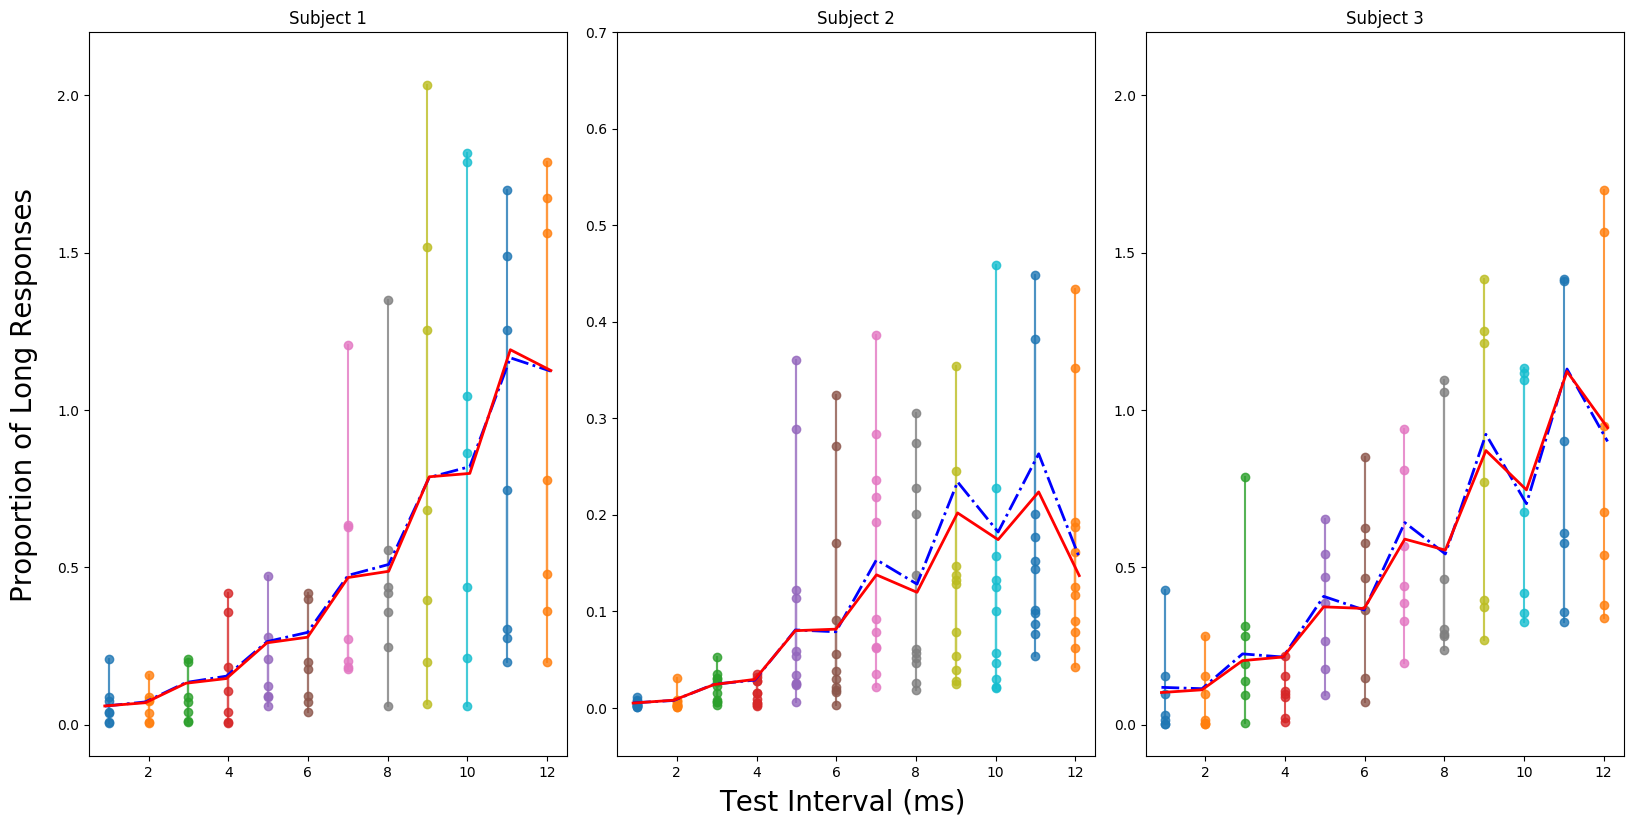

{0: array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]), 1: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 2: array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])}
{0: array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.]), 1: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 2: array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])}
[array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])]


In [33]:
varnames2 = ['beta_mu2']
tmp_mu2 = pm.df_summary(chain_2, varnames2)
Beta_Mu2 = tmp_mu2['mean']

Beta_Mu_2 = np.array([Beta_Mu2[i*12:(i+1)*12] for i in np.arange(25)])


fig = plt.figure(figsize=(16, 8))
fig.text(0.5, -0.02, 'Test Interval (ms)', ha='center', fontsize=20)
fig.text(-0.02, 0.5, 'Proportion of Long Responses', va='center', rotation='vertical', fontsize=20)
gs = gridspec.GridSpec(1, 3)
ppcsamples = 100

AA1 = {}
AA2 = {}
for ip in np.arange(companiesABC):
    ax = plt.subplot(gs[ip])
    xp = elec_year2[ip*7:(ip+1)*7, :]*Norm_year_std + Norm_year_Mean
    yp = Weight_Fault_ABC_All2[ip*7:(ip+1)*7, :]
    
    y2 = Beta_Mu_2[ip*7:(ip+1)*7, :]
    y3 = Beta_Mu_1[ip*7:(ip+1)*7, :]
    if ip==1:
        xp = elec_year2[ip*7:((ip+1)*7+4), :]*Norm_year_std + Norm_year_Mean
        yp = Weight_Fault_ABC_All2[ip*7:((ip+1)*7+4), :]
        y2 = Beta_Mu_2[ip*7:((ip+1)*7+4), :]
        y3 = Beta_Mu_1[ip*7:((ip+1)*7+4), :]
    if ip==2:
        xp = elec_year2[18:25, :]*Norm_year_std + Norm_year_Mean
        yp = Weight_Fault_ABC_All2[18:25, :]
        y2 = Beta_Mu_2[18:25, :]
        y3 = Beta_Mu_1[18:25, :]
    xl = np.linspace(0.9, 12.1, 12)

    y2 = y2.mean(axis=0)
    y3 = y3.mean(axis=0)
    AA1[ip] = y3
    AA2[ip] = y2
#     print(y2)
    ax.plot(xp, yp, marker='o', alpha=.8)
    plt.plot(xl, y3,  'b-.', linewidth=2)
    plt.plot(xl, y2,  'r', linewidth=2)
    plt.axis([0.5, 12.5, -.1, 2.2])
    if ip==1:
        plt.axis([0.5, 12.5, -.05, 0.7])
    plt.title('Subject %s' % (ip + 1))

plt.tight_layout()
plt.show()
print(AA1)
print(AA2)
BBB1 = []
BBB2 = []
for i in range(3):
    BBB1.append( AA1[i])
    BBB2.append( AA2[i])
print(BBB1)

In [34]:
# np.savetxt('E:/Code/Bayescode/QW_reliable/LOFG_BN/Picture/BNnoLOF_Pred.csv', BBB1, delimiter = ',')
# np.savetxt('E:/Code/Bayescode/QW_reliable/LOFG_BN/Picture/BNLOF_Pred.csv', BBB2, delimiter = ',')

In [14]:

WAIC_2 = pm.compare([trace_1, trace_2], [model_1, model_2], ic='WAIC')
print(WAIC_2)

LOOV2 = pm.compare([trace_1, trace_2], [model_1, model_2], ic='LOO')
print(LOOV2)

     WAIC  pWAIC  dWAIC weight     SE   dSE warning
1 -506.57  14.71      0      1  57.25     0       1
0 -464.76  16.65  41.81      0  60.73  9.97       1
      LOO   pLOO   dLOO weight     SE    dSE warning
1 -503.68  16.16      0      1  57.41      0       1
0 -461.24   18.4  42.44      0  61.18  10.63       1


In [15]:
# 计算拟合的均方误差
from sklearn.metrics import mean_absolute_error
def Rmse(predictions, targets):
    return  np.sqrt(np.mean((predictions - targets)**2))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

varnames1 = ['beta_mu']
varnames2 = ['beta_mu2']

tmp_mu1 = pm.df_summary(trace_1, varnames1)
tmp_mu2 = pm.df_summary(chain_2, varnames2)

Beta_Mu1 = tmp_mu1['mean']
Beta_Mu2 = tmp_mu2['mean']

ALL_faults3 = (elec_data.Fault.values / elec_data.Nums.values)  # 数组形式,计算故障率大小
Beta_Mu1 = Beta_Mu1/100 #还原
Beta_Mu2 = Beta_Mu2/100 #还原
ALL_faults1 = Weight_Fault_ABC_All/100

rmse2 = {}
rmse1 = {}
index = [0, 84, 216, 300]
MAE1 = {}; MAE2 = {}
MAPE1 = {}; MAPE2 = {}
for ip in np.arange(3):
    rmse1[ip] = Rmse(Beta_Mu1[index[ip]:index[ip+1]], ALL_faults3[index[ip]:index[ip+1]])
    rmse2[ip] = Rmse(Beta_Mu2[index[ip]:index[ip+1]], ALL_faults1[index[ip]:index[ip+1]])
#     MAE
    MAE1[ip] = mean_absolute_error(Beta_Mu1[index[ip]:index[ip+1]], ALL_faults3[index[ip]:index[ip+1]])
    MAE2[ip] = mean_absolute_error(Beta_Mu2[index[ip]:index[ip+1]], ALL_faults1[index[ip]:index[ip+1]])
#     MAPE    
    MAPE1[ip] = mean_absolute_percentage_error(Beta_Mu1[index[ip]:index[ip+1]], ALL_faults3[index[ip]:index[ip+1]])
    MAPE2[ip] = mean_absolute_percentage_error(Beta_Mu2[index[ip]:index[ip+1]], ALL_faults1[index[ip]:index[ip+1]])
print('对比拟合误差rmse1:', rmse1)
print('用于本文模型rmse2:', rmse2)
print('对比拟合误差MAE1:', MAE1)
print('用于本文模型MAE2:', MAE2)
print('对比拟合误差MAPE1:', MAPE1)
print('用于本文模型MAPE2:', MAPE2)

对比拟合误差rmse1: {0: 0.004448155063674254, 1: 0.0012998064736668377, 2: 0.0034269531314315123}
用于本文模型rmse2: {0: 0.004229394604948958, 1: 0.00098056409238562, 2: 0.0032504231838509515}
对比拟合误差MAE1: {0: 0.0030807219666471155, 1: 0.000813066346812646, 2: 0.00270909039859985}
用于本文模型MAE2: {0: 0.002960996514714388, 1: 0.0006865895456877682, 2: 0.0025843940383909066}
对比拟合误差MAPE1: {0: 66.44899668857643, 1: 73.47544938527854, 2: 61.8589238538595}
用于本文模型MAPE2: {0: 64.28605934992791, 1: 68.3314707359111, 2: 58.525039432745544}


In [16]:
# 计算置信区间大小
def MPIWidth(y_5, y_95): 
    y_5, y_95 = np.array(y_5), np.array(y_95)
    return np.mean(np.abs((y_5 - y_95))) * 100

# 后验。用于预测，计算预测误差
data_cs = pd.read_csv('XZnozero_12_Pred.csv')
data_cs_1 = data_cs.Year.values # 测试数据时间
data_cs_1 = (data_cs_1 - np.mean(data_cs_1)) / np.std(data_cs_1)

xs_year.set_value(np.asarray(data_cs_1))
with model_1:
    pp_trace1 = pm.sample_ppc(trace_1, 1000)
post_pred1 = pp_trace1['Observed']
yipred_mean1 = post_pred1.mean(axis=0)
sig_Model1 = pm.hpd(post_pred1, alpha=0.05) #用于计算MPIW1
sig_Model1 = np.array(sig_Model1)

with model_2:
    pp_trace2 = pm.sample_ppc(trace_2, 1000)
post_pred2 = pp_trace2['Observed2']
yipred_mean2 = post_pred2.mean(axis=0)
sig_Model2 = pm.hpd(post_pred2, alpha=0.05)
sig_Model2 = np.array(sig_Model2)


Pred_MAP2 = yipred_mean2/100 #还原
Pred_MAP1 = yipred_mean1/100 #还原
# print(sig_Model2[:, 0])
# print(len(Pred_MAP1))

Pred_fault = data_cs.Fault.values / data_cs.Nums.values #这里不需要除以100
Pred_fault_A = Pred_fault[:12]  #预测值,只预测一年的值
Pred_fault_B = Pred_fault[84:96]
Pred_fault_C = Pred_fault[216:228]
Pred_fault_ABC = np.vstack((Pred_fault_A, Pred_fault_B, Pred_fault_C))
# print(Pred_fault_ABC)
ALL_faults1 = Weight_Fault_ABC_All/100

rmse2 = {}
rmse1 = {}
index = [0, 84, 216, 300]
index2 = [0, 84, 216, 300]
MAE1 = {}; MAE2 = {}
MAPE1 = {}; MAPE2 = {}
MPIW1 = {}; MPIW2 = {}
for ip in np.arange(3):
    rmse1[ip] = Rmse(Pred_MAP1[index[ip]:(index[ip]+12)], Pred_fault_ABC[ip])
    rmse2[ip] = Rmse(Pred_MAP2[index[ip]:(index[ip]+12)], ALL_faults1[index[ip]:(index[ip]+12)])  
#     MAE
    MAE1[ip] = mean_absolute_error(Pred_MAP1[index[ip]:(index[ip]+12)], Pred_fault_ABC[ip])
    MAE2[ip] = mean_absolute_error(Pred_MAP2[index[ip]:(index[ip]+12)], ALL_faults1[index[ip]:(index[ip]+12)])
#     MAPE    
    MAPE1[ip] = mean_absolute_percentage_error(Pred_MAP1[index[ip]:(index[ip]+12)], Pred_fault_ABC[ip])
    MAPE2[ip] = mean_absolute_percentage_error(Pred_MAP2[index[ip]:(index[ip]+12)], ALL_faults1[index[ip]:(index[ip]+12)])
#     MPIW    
    MPIW1[ip] = MPIWidth(sig_Model1[index[ip]:index[ip+1],0], sig_Model1[index[ip]:index[ip+1],1])
    MPIW2[ip] = MPIWidth(sig_Model2[index[ip]:index[ip+1],0], sig_Model2[index[ip]:index[ip+1],1])
print('对比预测误差rmse1:', rmse1)
print('用于本文模型rmse2:', rmse2)
print('对比预测误差MAE1:', MAE1)
print('用于本文模型MAE2:', MAE2)
print('对比预测误差MAPE1:', MAPE1)
print('用于本文模型MAPE2:', MAPE2)
print('对比预测误差MPIW1:', MPIW1)
print('用于本文模型MPIW2:', MPIW2)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2151.83it/s]


对比预测误差rmse1: {0: 0.003387445467836768, 1: 0.0008501818364235364, 2: 0.0036582313305979297}
用于本文模型rmse2: {0: 0.0032648924750259736, 1: 0.000697512369977986, 2: 0.00413345876619011}
对比预测误差MAE1: {0: 0.002366960601112369, 1: 0.0006401399157880098, 2: 0.0032346611173309082}
用于本文模型MAE2: {0: 0.002194731961387085, 1: 0.0005379862706543364, 2: 0.003591845127759954}
对比预测误差MAPE1: {0: 61.79778875432592, 1: 55.1363430369676, 2: 72.72272333227977}
用于本文模型MAPE2: {0: 60.009813850238324, 1: 52.940942757538046, 2: 91.65547171714447}
对比预测误差MPIW1: {0: 140.97506324406658, 1: 32.04147566918162, 2: 153.72275686825978}
用于本文模型MPIW2: {0: 130.7451665500239, 1: 27.71793869636707, 2: 139.49576402031587}


[140.97506324406658, 32.04147566918162, 153.72275686825978]
[130.7451665500239, 27.71793869636707, 139.49576402031587]
[-0.  1.  2.]


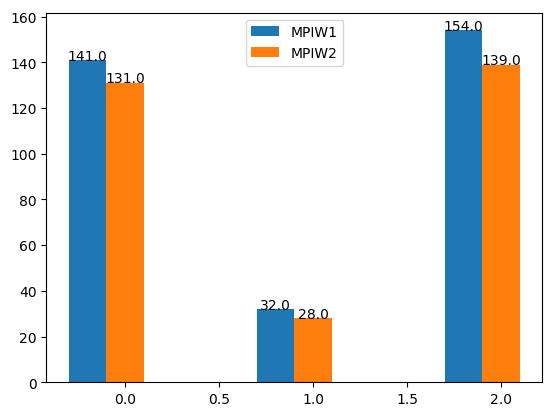

In [17]:
# 画出置信区间差异图
Model_MPIW1 = []
Model_MPIW2 = []
for i in range(3):
    AA = MPIW1[i]; BB = MPIW2[i]
    Model_MPIW1.append(AA)
    Model_MPIW2.append(BB)
print(Model_MPIW1)
print(Model_MPIW2)
Model_MPIW1 = np.round(Model_MPIW1)
Model_MPIW2 = np.round(Model_MPIW2)

size = 3
x = np.arange(size)

total_width, n = 0.6, 3
width = total_width / n
x = x - (total_width - width) / 2
print(x)
plt.bar(x, Model_MPIW1, width=width, label='MPIW1')
plt.bar(x + width, Model_MPIW2, width=width, label='MPIW2')
for xx, yy in zip(x, Model_MPIW1):
    plt.text(xx, yy+0.1, str(yy), ha='center')
for xx, yy in zip(x+ width, Model_MPIW2):
    plt.text(xx, yy+0.1, str(yy), ha='center')
plt.legend()
plt.show()

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2587.59it/s]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]


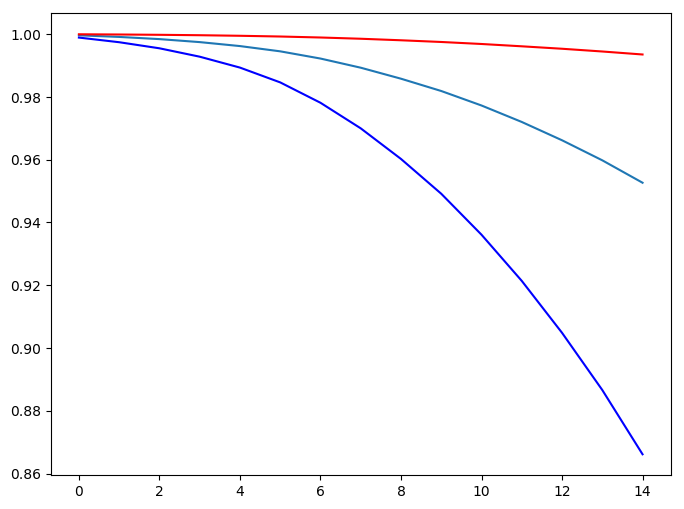

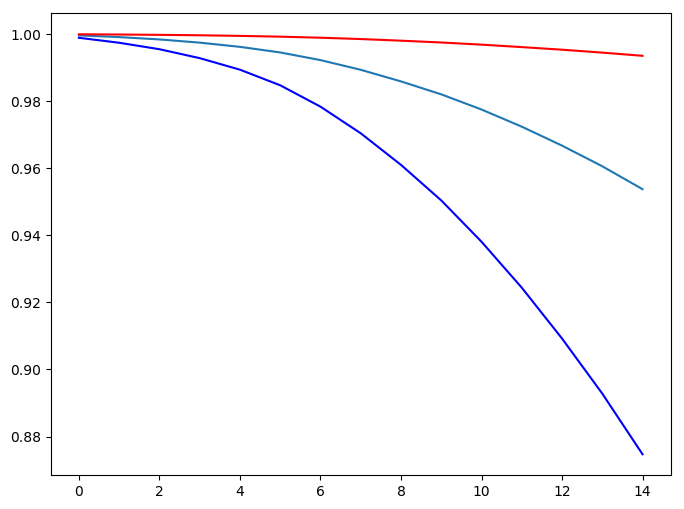

In [19]:
# 后验。用于预测，计算预测误差
# data_cs = pd.read_csv('XZnozero_12_Pred.csv')
# Year_Count = 12; Year_Metra = 25   #if data_cs = XZnozero_12_Pred

data_cs = pd.read_csv('XZnozero_12_Pred_14.csv')
Year_Count = 15; Year_Metra = 20   #if data_cs = XZnozero_12_Pred_14
data_cs_1 = data_cs.Year.values # 测试数据时间
data_cs_1 = (data_cs_1 - np.mean(data_cs_1)) / np.std(data_cs_1)

xs_year.set_value(np.asarray(data_cs_1))
with model_2:
    pp_trace2 = pm.sample_ppc(trace_2, 1000)
post_pred2 = pp_trace2['Observed2']
# print(post_pred2)
yipred_mean0 = post_pred2.mean(axis=0) #256

Mean_pred1 = np.array([yipred_mean0[i*Year_Count:(i+1)*Year_Count] for i in np.arange(Year_Metra)])
Mean_pred2 = Mean_pred1.mean(axis=0)
print(Mean_pred2)

low, high = np.percentile(pp_trace2['Observed2'], [10, 95], axis=0)
Mean_low1 = np.array([low[i*Year_Count:(i+1)*Year_Count] for i in np.arange(Year_Metra)])
Mean_low2 = Mean_low1.mean(axis=0)
Mean_high1 = np.array([high[i*Year_Count:(i+1)*Year_Count] for i in np.arange(Year_Metra)])
Mean_high2 = Mean_high1.mean(axis=0)

Mean12 = Mean_pred2[:Year_Count]/100
Meanlow3 = Mean_low2[:Year_Count]/100
Meanhigh3 = Mean_high2[:Year_Count]/100
AAA = []
BBB = []
CCC = []
for i in range(len(Mean12)):
    AAA.append(1-Mean12[:(i+1)].sum())
    BBB.append(1-Meanlow3[:(i+1)].sum())
    CCC.append(1-Meanhigh3[:(i+1)].sum())
# YAAA= 1 - AAA
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)
ax.plot(AAA)
ax.plot(BBB, 'r')
ax.plot(CCC, 'b')
plt.show()


AAA = []
BBB = []
CCC = []
for i in range(len(Mean12)):
    AAA.append(np.exp(-Mean12[:(i+1)].sum()))
    BBB.append(np.exp(-Meanlow3[:(i+1)].sum()))
    CCC.append(np.exp(-Meanhigh3[:(i+1)].sum()))
# YAAA= 1 - AAA
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)
ax.plot(AAA)
ax.plot(BBB, 'r')
ax.plot(CCC, 'b')
plt.show()

# np.savetxt('E:/Code/Bayescode/QW_reliable/LOFG_BN/Picture/Reliabily_AAA.csv', AAA, delimiter = ',')
# np.savetxt('E:/Code/Bayescode/QW_reliable/LOFG_BN/Picture/Reliabily_BBB.csv', BBB, delimiter = ',')
# np.savetxt('E:/Code/Bayescode/QW_reliable/LOFG_BN/Picture/Reliabily_CCC.csv', CCC, delimiter = ',')